In [1]:
import tensorflow as tf
import tensorflow.keras as keras 
from tensorflow.keras.layers import Input, Dense

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
sess = InteractiveSession(config=config)


from minigraphnets import Node , Edge, Graph

# Trying to fit a random field with a graphnet:

In [2]:
# in_graph , out_graph , node_positions,gg = sample_graph_from_2d_result(points, all_vals[0])


In [3]:
# gn_encode.save("/tmp/encode")
# gn_process.save("/tmp/core")
# gn_decode.save("/tmp/decode")

In [4]:
%load_ext autoreload
%autoreload 2
from graphnet_utils import * 
from random_field_model import * 

## Creation of the random field data:
# Creates a 20x20 grid of points and a random field with them.
k = ExpQuadKernel(0.3)
#points = np.random.randn(10,2)
npoints = 20
[xx,yy] = np.meshgrid(np.linspace(-1,1,npoints), np.linspace(-31,1,npoints))
points = np.vstack([xx.flatten(), yy.flatten()]).T
C = k.get_chol(points)

r = np.random.randn(np.prod(xx.flatten().shape))
all_vals = [];
for i in range(10):
    vals = r @ C.T
    r = np.random.randn(np.prod(xx.flatten().shape))
    all_vals.append(vals) #vals.reshape(xx.shape))

# samples a single graph from 1 of the sampled random fields:
in_graph , out_graph , node_positions = sample_graph_from_2d_result(points, all_vals[0])
input_graphs, output_graphs, node_positions  = get_multiple_graph_samples_random_fields(1,all_vals,points, pct_observed=10,pct_unobserved=90)
#[len(e.edges) for e in input_graphs]
all_nodes_in, all_edges_in , all_nodes_out, all_edges_out =[ [],[],[],[]] ;
n_node_in, n_node_out = [[],[]]
n_edge_in, n_edge_out = [[],[]]
for g in input_graphs :
    all_edges_in.extend(g.edges) 
    all_nodes_in.extend(g.nodes)
    n_node_in. append(g.nodes.__len__())
    n_edge_in.append(g.edges.__len__())
    

for g in output_graphs:
    all_edges_out.extend(g.edges)
    all_nodes_out.extend(g.nodes)

gin = Graph(all_nodes_in,  all_edges_in)
gout = Graph(all_nodes_out, all_edges_out)

.
.
.
.
.
.
.
.
.
.


In [16]:
from minigraphnets import make_graph_tuple_from_graph_list, GraphTuple

In [353]:

graph_tuple = make_graph_tuple_from_graph_list(input_graphs)

In [354]:

graph2 = graph_tuple.get_graph(1)
graph2.is_equal_by_value(input_graphs[1])

TypeError: is_equal_by_value() missing 1 required positional argument: 'g2'

In [324]:
g1 =graph2
g2 = graph2.copy()


In [331]:
compare_connectivity(graph_tuple.get_graph(1), graph_tuple.get_graph(1))
    
#nodes_from_dict = [node_from1 == node_from2 for node_from1,node_from2 in zip([e1.node_from for e1 in g1.edges], [e2.node_from for e2 in g2.edges])]
#nodes_to_dict = {node_to1 : node_to2 for node_to1,node_to2 in zip([e1.node_to for e1 in g1.edges], [e2.node_to for e2 in g2.edges])}

#graph2.nodes[0].node_attr_tensor

True

NameError: name 'reduce' is not defined

In [79]:

def make_graph_tuple_from_graph_list(list_of_graphs):
    """
    Takes in a list of graphs (with consistent sizes - not checked)
    and creates a graph tuple (input tensors + some book keeping)
    
    Because there is some initial functionality I don't want to throw away currently, that implements special treatment for nodes and edges
    coming from graphs with the same topology, it is currently required that the first dimension of nodes and edges
    for the list of graphs that are entered in this function is always 1 (this dimension is the batch dimension in the previous implementation.)
    """
    # graph_id = [id_ for id_, dummy in enumerate(list_of_graphs)]
    all_edges, all_nodes, n_nodes,n_edges =[[],[],[],[]]
    for g in list_of_graphs:
        all_edges.extend(g.edges)
        all_nodes.extend(g.nodes)
        n_nodes.append(len(g.nodes)) 
        n_edges.append(len(g.edges)) 
    
    edge_attr_tensor, nodes_attr_tensor, senders, receivers = [[],[],[],[]];
    for e in all_edges:
        edge_attr_tensor.append(e.edge_tensor)
        senders.append(all_nodes.index(e.node_from))
        receivers.append(all_nodes.index(e.node_to))
        
        #senders.append(e.node_from.find(gin.nodes))
        #receivers.append(e.node_to.find(gin.nodes))
    
    for n in all_nodes:
        nodes_attr_tensor.append(n.node_attr_tensor)
    
    edges_attr_stacked = tf.stack(edge_attr_tensor,0)
    nodes_attr_stacked = tf.stack(nodes_attr_tensor,0)
    return GraphTuple(nodes_attr_stacked, edges_attr_stacked,senders, receivers, n_nodes, n_edges)# , graph_id)

graph_tuple = make_graph_tuple_from_graph_list(input_graphs)

#edge_attr_tensor_stacked = tf.stack(edge_attr_tensor)


#n_node_in

In [80]:
#graph_tuple.edges


In [81]:
in_graph , out_graph , node_positions_0 = sample_graph_from_2d_result(points, all_vals[0])

In [82]:
help(sample_graph_from_2d_result)

Help on function sample_graph_from_2d_result in module random_field_model:

sample_graph_from_2d_result(points, all_vals_, pct_x=10, pct_y=10, cutoff=0.5)



In [83]:
help( get_multiple_graph_samples_random_fields)
    

Help on function get_multiple_graph_samples_random_fields in module random_field_model:

get_multiple_graph_samples_random_fields(nsamples, vals, all_points, pct_observed=10, pct_unobserved=None, cutoff=0.5)
    Returns graph samples from a random field.
    
    nsamples: how many samples per random field to take
    vals: the values of the random field.
    all_points: the coordinates of all the points of the random fields
    pct_observed: the percentage of the positions of the random field assumed observed for each sample
    pct_unobserved: the percentage of the positions of the random field assumed unobserved.



In [84]:
#graph_state_size = (10,);
graph_state_size = 10;
qoi_size = 1; # dimension of the random field.
functions_encode = make_mlp_graphnet_functions(15,input_size=1, output_size=graph_state_size, graph_indep=True)
functions_core   = make_mlp_graphnet_functions(15,input_size = graph_state_size,output_size = graph_state_size)
functions_decode = make_mlp_graphnet_functions(15,input_size = graph_state_size,output_size=1, graph_indep = True)

gn_encode = GraphNet(**functions_encode)
gn_process = GraphNet(**functions_core)
gn_decode = GraphNet(**functions_decode)

def eval_network(graph, core_iterations = 3, residual = True, eval_mode = "batched"):
    g = gn_encode.graph_eval(graph.copy(), eval_mode = eval_mode)
    for k in range(core_iterations):
        if residual:
            g = g + gn_process.graph_eval(g, eval_mode= eval_mode)
        else:
            g = gn_process.graph_eval(g, eval_mode = eval_mode)
            
    return gn_decode.graph_eval(g, eval_mode = eval_mode)

res = eval_network(input_graphs[0])

In [29]:
#help(tf.math.unsorted_segment_sum)

In [94]:
functions_testing_gi = make_mlp_graphnet_functions( 15, input_size = 1, output_size = 10, graph_indep=True)
gn_testing_gi = GraphNet(**functions_testing_gi)
gn_testing_gi.eval_graph_tuple(graph_tuple)

In [242]:
batch_size = 12
tf.keras.backend.set_floatx("float64")
node_input_size = 10
edge_input_size = node_input_size

n1 = Node(np.random.randn(batch_size,node_input_size))
n2 = Node(np.random.randn(batch_size, node_input_size))
n3 = Node(np.random.randn(batch_size, node_input_size))
node_abs_vals = [np.abs(n.node_attr_tensor) for n in [n1,n2,n3]]

e12 = Edge(np.random.randn(batch_size, edge_input_size),node_from = n1,node_to = n2)
e21 = Edge(np.random.randn(batch_size, edge_input_size),node_from = n2,node_to = n1)
e23 = Edge(np.random.randn(batch_size, edge_input_size),node_from = n2,node_to = n3)
edge_abs_vals = [np.abs(e.edge_tensor) for e in [e12,e21,e23]]

g1 = Graph([n1,n2,n3],[e12,e21,e23])

gi = True
graph_fcn = make_mlp_graphnet_functions(150, input_size = node_input_size, output_size = node_input_size, graph_indep=gi)
graph_fcn.update({"graph_independent" : gi})
gn = GraphNet(**graph_fcn )
res1 = gn.graph_eval(g1.copy(),eval_mode = "safe")
res2 = gn.graph_eval(g1.copy(), eval_mode = "batched")
error_nodes = np.max([np.linalg.norm(n1.node_attr_tensor - n2.node_attr_tensor) for n1, n2 in zip(res1.nodes, res2.nodes)])/np.min(node_abs_vals)
error_edges = np.max([np.linalg.norm(e1.edge_tensor - e2.edge_tensor) for e1,e2 in zip(res1.edges, res2.edges)])/np.min(edge_abs_vals)

print(error_nodes, error_edges)

1.3069682055107748e-12 8.589980343263096e-13


In [234]:
edge_state_output_size = 10
edge_state_output_shape = (10,)
x1= Input(shape = (None,*edge_state_output_shape))
i1 = Input(shape = (1,), dtype = "int64")
n_nodes = Input(shape = (None,), dtype = "int64")
output = tf.math.unsorted_segment_sum(x1,i1, tf.reduce_sum(n_nodes))
m = Model(inputs = [x1,i1,n_nodes], outputs = output)


In [235]:
m.save("/tmp/agg_fcn")

INFO:tensorflow:Assets written to: /tmp/agg_fcn/assets


In [237]:
m2 = keras.models.load_model("/tmp/agg_fcn")

In [239]:
m2.inputs

[<tf.Tensor 'input_82_2:0' shape=(None, None, 10) dtype=float64>,
 <tf.Tensor 'input_83_2:0' shape=(None, 1) dtype=int64>,
 <tf.Tensor 'input_84_2:0' shape=(None, None) dtype=int64>]

In [153]:
res2.nodes[0].node_attr_tensor

<tf.Tensor: shape=(12, 10), dtype=float32, numpy=
array([[ 0.03108534,  0.17391367, -0.24829674, -0.07033135,  0.01862783,
        -0.14595345, -0.01698177,  0.02596458, -0.06878846,  0.02918134],
       [-0.09728964, -0.11196799, -0.2279651 , -0.00273526, -0.2798784 ,
        -0.10469934,  0.01165986,  0.09773215, -0.1175105 ,  0.21493362],
       [-0.21091428, -0.3506199 , -0.09562246, -0.02506188, -0.14542156,
        -0.02671634, -0.27484632,  0.10873209, -0.24032196,  0.00211454],
       [-0.02313604,  0.15510258, -0.3587926 ,  0.30579394, -0.49178445,
         0.06061594,  0.2558151 , -0.17757227, -0.24366578,  0.40690148],
       [-0.2924996 , -0.8193254 , -0.08450216,  0.13263129, -0.68790156,
        -0.19784717, -0.6920202 ,  0.17753038, -0.4729365 ,  0.19684654],
       [-0.06827909, -0.15766528, -0.05833822,  0.06145369, -0.25928017,
        -0.07629173, -0.13616677,  0.05199388, -0.09221086,  0.10788022],
       [ 0.07231128,  0.1903121 , -0.17270255, -0.08464649,  0.29578

In [127]:
gn_graphindep_eval = 

SyntaxError: invalid syntax (<ipython-input-127-3eaa4e618afd>, line 1)

In [91]:
## 
functions_testing_gi = make_mlp_graphnet_functions( 15, input_size = 1, output_size = 10, graph_indep=True)
functions_testing = make_mlp_graphnet_functions( 15, input_size = 1, output_size = 10)
gn_testing = GraphNet(**functions_testing)
gn_testing_gi.nodes
#gn_testing.edge_function(graph_tuple.edges)
#gn_testing.edge_function.summary()
#def eval_edge_block(graphnet, graph_tuple):
#    sender_nodes = tf.stack()
#gn_testing.
#graph_tuple.nodes[graph_tuple.senders]
#help(tf.gather)#(graph_tuple.senders)
#graph_tuple.nodes

# Edge block (with sender and receiver nodes)
senders_ = tf.gather(graph_tuple.nodes,graph_tuple.senders)
receivers_ = tf.gather(graph_tuple.nodes,graph_tuple.receivers)
edge_features = graph_tuple.edges
edge_block_out = gn_testing.edge_function([edge_features,senders_,receivers_])

edge_to_nodes = tf.math.unsorted_segment_mean(edge_block_out, graph_tuple.receivers, np.sum(graph_tuple.n_nodes))
#gn_testing.node_function()

# # The following creates a receiver or a node aggregator.
# def EdgeToNodeAggregatorFactory(reducer_function = "mean",target = "receiver"):
#     assert(target in ["receiver","source"])
#     assert(reducer_function in ["mean", "sum","max","min"])
    
#     def mean_aggregator(graph_tuple,edge_block_output)
#         """
#         Depending on whether this is a receiver or a sender aggregator, the 
#         """
#         if target == "receivers":
#             aggregated_edge_messages = tf.math.unsorted_segment_mean(edge_block_out, graph_tuple.receivers, np.sum(graph_tuple.n_nodes))
            
#         if target == "senders":
#             aggregated_edge_messages = tf.math.unsorted_segment_mean(edge_block_out, graph_tuple.senders, np.sum(graph_tuple.n_nodes))
#         return aggregated_edge_messages
        
#     return 
    

# Node block:
# * aggregate for receivers
#help(tf.gather)# edge_block_out
#tf.gather()
# Stack the node input:


NameError: name 'gn_testing_gi' is not defined

In [90]:
nodes_res = gn_testing.node_function([ edge_to_nodes, graph_tuple.nodes])

InvalidArgumentError: Matrix size-incompatible: In[0]: [7630,11], In[1]: [2,15] [Op:MatMul]

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
edge_state_agg (InputLayer)     [(None, 1)]          0                                            
__________________________________________________________________________________________________
node_state (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate_11 (Concatenate)    (None, 2)            0           edge_state_agg[0][0]             
                                                                 node_state[0][0]                 
__________________________________________________________________________________________________
dense_60 (Dense)                (None, 15)           45          concatenate_11[0][0]      

In [63]:
help(tf.math.unsorted_segment_max)

Help on function unsorted_segment_max in module tensorflow.python.ops.gen_math_ops:

unsorted_segment_max(data, segment_ids, num_segments, name=None)
    Computes the maximum along segments of a tensor.
    
    Read
    [the section on segmentation](https://tensorflow.org/api_docs/python/tf/math#Segmentation)
    for an explanation of segments.
    
    This operator is similar to the unsorted segment sum operator found
    [(here)](../../../api_docs/python/math_ops.md#UnsortedSegmentSum).
    Instead of computing the sum over segments, it computes the maximum such that:
    
    \\(output_i = \max_{j...} data[j...]\\) where max is over tuples `j...` such
    that `segment_ids[j...] == i`.
    
    If the maximum is empty for a given segment ID `i`, it outputs the smallest
    possible value for the specific numeric type,
    `output[i] = numeric_limits<T>::lowest()`.
    
    If the given segment ID `i` is negative, then the corresponding value is
    dropped, and will not be include

In [45]:

output_graphs[0].nodes.__len__() , input_graphs[0].nodes.__len__()


(847, 847)

In [198]:


#ghat = eval_network(gin)

#g = input_graphs[0];

#zip(g.nodes, ghat.nodes)

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

loss_fcn= lambda x,y : tf.reduce_mean(tf.pow(x-y,2))
loss_history = []
for i in tqdm.tqdm(range(0,100)):
    with tf.GradientTape() as tape:
        ghat = eval_network(gin.copy())
        nodes_losses = []
        for n1,n2 in zip(ghat.nodes, gout.nodes):
            nodes_losses.append(loss_fcn(n1.node_attr_tensor,n2.node_attr_tensor))
        loss = tf.reduce_mean(nodes_losses)
        weights = [*gn_decode.weights(), *gn_encode.weights(), *gn_process.weights()]
        
        grads = tape.gradient(loss, weights)
        opt.apply_gradients(zip(grads,weights))
        
    loss_history.append(loss)
    print(loss)
    
            
            
    

    







  0%|          | 0/100 [00:00<?, ?it/s]







  1%|          | 1/100 [00:27<44:38, 27.06s/it]

tf.Tensor(0.30039755, shape=(), dtype=float32)








  2%|▏         | 2/100 [00:53<43:53, 26.88s/it]

tf.Tensor(0.28872758, shape=(), dtype=float32)








  3%|▎         | 3/100 [01:19<43:04, 26.64s/it]

tf.Tensor(0.27718493, shape=(), dtype=float32)








  4%|▍         | 4/100 [01:45<42:08, 26.34s/it]

tf.Tensor(0.27624598, shape=(), dtype=float32)








  5%|▌         | 5/100 [02:11<41:46, 26.38s/it]

tf.Tensor(0.2690436, shape=(), dtype=float32)








  6%|▌         | 6/100 [02:37<41:12, 26.31s/it]

tf.Tensor(0.26637098, shape=(), dtype=float32)








  7%|▋         | 7/100 [03:05<41:11, 26.57s/it]

tf.Tensor(0.26626936, shape=(), dtype=float32)








  8%|▊         | 8/100 [03:33<41:32, 27.09s/it]

tf.Tensor(0.26273796, shape=(), dtype=float32)








  9%|▉         | 9/100 [04:00<40:56, 27.00s/it]

tf.Tensor(0.26314235, shape=(), dtype=float32)








 10%|█         | 10/100 [04:28<41:15, 27.51s/it]

tf.Tensor(0.26440924, shape=(), dtype=float32)








 11%|█         | 11/100 [04:57<41:09, 27.75s/it]

tf.Tensor(0.26283118, shape=(), dtype=float32)








 12%|█▏        | 12/100 [05:23<39:59, 27.27s/it]

tf.Tensor(0.26249447, shape=(), dtype=float32)








 13%|█▎        | 13/100 [05:51<39:55, 27.53s/it]

tf.Tensor(0.26279682, shape=(), dtype=float32)








 14%|█▍        | 14/100 [06:20<40:14, 28.07s/it]

tf.Tensor(0.2611778, shape=(), dtype=float32)








 15%|█▌        | 15/100 [06:47<39:21, 27.78s/it]

tf.Tensor(0.26072654, shape=(), dtype=float32)


KeyboardInterrupt: 

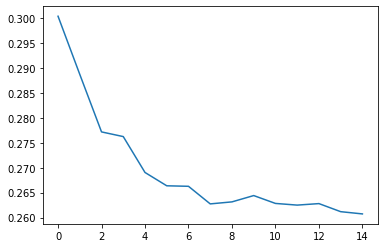

In [199]:
pplot.plot(loss_history)

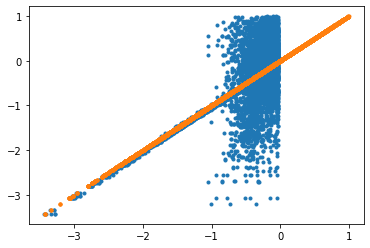

In [200]:
ghat = eval_network(gin.copy())
node_out_vals_hat = np.array([n.node_attr_tensor.numpy()  for n in ghat.nodes]).flatten()
node_out_vals = np.array([n.node_attr_tensor  for n in gout.nodes]).flatten()
pplot.plot(node_out_vals_hat, node_out_vals,'.')
pplot.plot( node_out_vals, node_out_vals,'.')

In [139]:
graphs_out = eval_network(input_graphs[index])
points_out = node_posi[index]

In [205]:
index = 2
is_unobserved = [np.all(n1.node_attr_tensor!= n2.node_attr_tensor) for n1,n2 in zip(input_graphs[index].nodes,output_graphs[index].nodes)]
out_hat = eval_network(input_graphs[index].copy())
vals=  np.hstack([n.node_attr_tensor.numpy().flatten() for n in out_hat.nodes])
vals_actual = np.hstack([n.node_attr_tensor.flatten() for n in output_graphs[index].nodes])


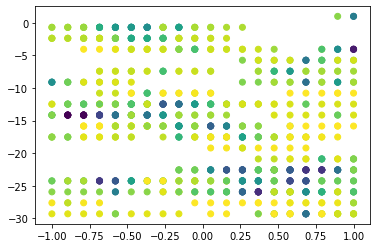

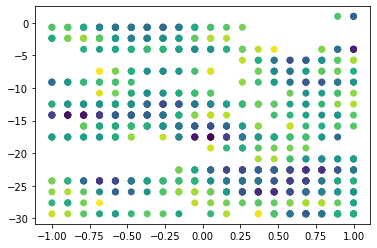

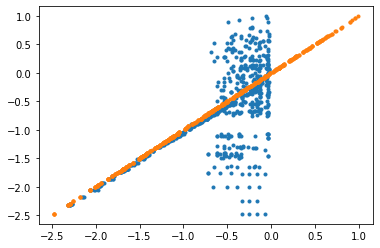

In [206]:
pos = np.array(node_positions[index])
#pplot.scatter(pos[is_unobserved,0], pos[is_unobserved,1], c = vals[is_unobserved])
pplot.scatter(pos[:,0], pos[:,1], c = vals)
pplot.show()
pplot.scatter(pos[:,0], pos[:,1], c = vals_actual)

#pplot.scatter(pos[is_unobserved,0], pos[is_unobserved,1], c = vals[is_unobserved])
pplot.show()
pplot.plot(vals,vals_actual,'.')
pplot.plot(vals_actual,vals_actual,'.')


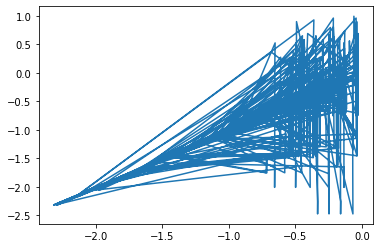

In [207]:
pplot.plot(vals, vals_actual)

# Other tests:

In [2]:
from graphnet_utils import GraphNet, GraphNetFunctionFactory

In [3]:
gn = GraphNetFunctionFactory()

In [5]:
gn.make_graphnet_comp_blocks(100)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [8]:

GraphNetFunctionFactory.make_edge_aggregation_function(self = None,edge_out_shape  = 10)

In [20]:
class aaa:
    def __init__(self):
        self.make_asdf(3)
        
    @classmethod
    def make_asdf(self,k):
        return "asdf" + str(k)
    

aaa()

In [21]:
aaa.make_asdf(3)

'asdf3'